In [27]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb

# ETL

In [2]:
df=pd.read_csv('../data/rm-yields-data.csv')

In [7]:
gdf=gpd.read_file('../data/RM_shapefile/RuralMunicipality.shp')

In [8]:
gdf['RMNO']=gdf['RMNO'].astype('int').astype('string')

In [9]:
gdf

PPID       EFFDT  EXPDT FEATURECD RMNO             RMNM  \
0    0101000095  2019-01-21    NaN    RMPPID   95      GOLDEN WEST   
1    0101000378  2019-07-29    NaN    RMPPID  378        ROSEMOUNT   
2    0101000288  2015-01-27    NaN    RMPPID  288  PLEASANT VALLEY   
3    0101000106  2019-04-24    NaN    RMPPID  106     WHISKA CREEK   
4    0101000132  2019-07-16    NaN    RMPPID  132     HILLSBOROUGH   
..          ...         ...    ...       ...  ...              ...   
293  0101000588  2022-12-19    NaN    RMPPID  588      MEADOW LAKE   
294  0101000352  2022-12-21    NaN    RMPPID  352     HEART'S HILL   
295  0101000351  2022-12-21    NaN    RMPPID  351         PROGRESS   
296  0101000520  2022-12-21    NaN    RMPPID  520      PADDOCKWOOD   
297  0101000491  2022-12-21    NaN    RMPPID  491         BUCKLAND   

       SHAPE_AREA     SHAPE_LEN  \
0    8.101431e+08  2.658514e+05   
1    5.844701e+08  1.612719e+05   
2    8.532007e+08  1.168951e+05   
3    8.526283e+08  1.292883e+05   
4    6.343913e+08  1.030527e+05   
..            ...           ...   
293  5.922870e+09  1.011120e+06   
294  8.812504e+08  1.210734e+05   
295  8.441731e+08  1.419927e+05   
296  2.408683e+09  6.212794e+05   
297  8.095962e+08  2.260746e+05   

                                              geometry  
0    POLYGON ((654081.000 5546088.320, 654885.320 5...  
1    POLYGON ((265258.740 5810148.180, 266062.740 5...  
2    POLYGON ((254141.490 5701256.420, 254179.510 5...  
3    POLYGON ((339874.810 5539057.770, 339849.430 5...  
4    POLYGON ((445175.620 5573313.600, 445572.880 5...  
..                                                 ...  
293  MULTIPOLYGON (((307104.520 6003527.820, 307139...  
294  POLYGON ((187054.680 5758478.840, 187005.860 5...  
295  POLYGON ((209380.850 5785495.100, 209851.950 5...  
296  MULTIPOLYGON (((451283.150 5981138.420, 451285...  
297  POLYGON ((439451.190 5922989.290, 439441.900 5...  

[298 rows x 9 columns]

## Scoping

What problem I will solve?

## Data Collections

In [10]:
df['Canola']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
25307    39.3
25308    46.1
25309    40.9
25310    23.9
25311    44.4
Name: Canola, Length: 25312, dtype: float64

In [11]:
ds= pd.DataFrame()

ds['Canola Mean']=df.loc[(df['Year'] > 2012) & (df['Year'] <= 2022)].groupby('RM').mean()['Canola']
ds['Canola Std']=df.loc[(df['Year'] > 2012) & (df['Year'] <= 2022)].groupby('RM').std()['Canola']

In [12]:
ds = ds.reset_index()

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RM           295 non-null    int64  
 1   Canola Mean  295 non-null    float64
 2   Canola Std   294 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.0 KB


In [14]:
ds['RM']=ds['RM'].astype('string')

In [15]:
gds = gpd.GeoDataFrame(pd.merge(ds, gdf.rename(columns={'RMNO':'RM'})[['RM', 'geometry']], on='RM'))

In [16]:
gds=gds.loc[gds['RM']!='521']

<Axes: >

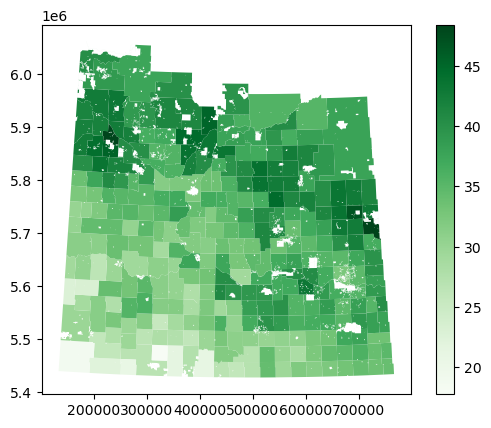

In [17]:
gds.plot('Canola Mean', legend=True, cmap='Greens')

<AxesSubplot:>

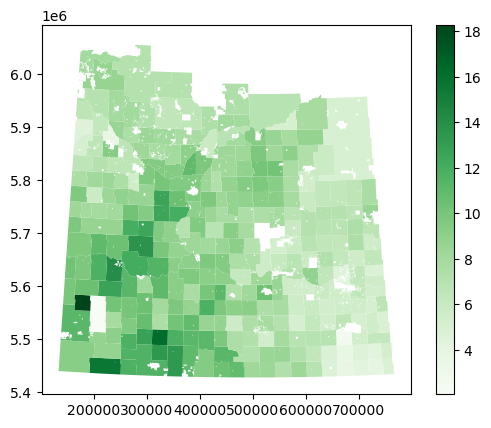

In [13]:
gds.plot('Canola Std', legend=True, cmap='Greens')

In [18]:
gds.isna().sum()

RM             0
Canola Mean    0
Canola Std     1
geometry       0
dtype: int64

In [19]:
df.loc[(df['RM']==279) & (df['Year'] > 2012)]['Canola'].isna()

14340    False
14341     True
14342     True
14343     True
14344     True
14345     True
14346     True
14347     True
14348     True
14349     True
Name: Canola, dtype: bool

In [20]:
ds

RM  Canola Mean  Canola Std
0      1       34.035    4.714758
1      2       33.515    4.058955
2      3       34.103    4.238863
3      4       33.095    3.796540
4      5       32.304    4.659574
..   ...          ...         ...
290  520       39.783    7.413043
291  555       40.092    7.145617
292  561       38.856    8.582959
293  588       37.569    7.127076
294  622       40.306    8.033867

[295 rows x 3 columns]

In [21]:
ds=ds.dropna()

In [22]:
ds.isna().sum()

RM             0
Canola Mean    0
Canola Std     0
dtype: int64

<Axes: >

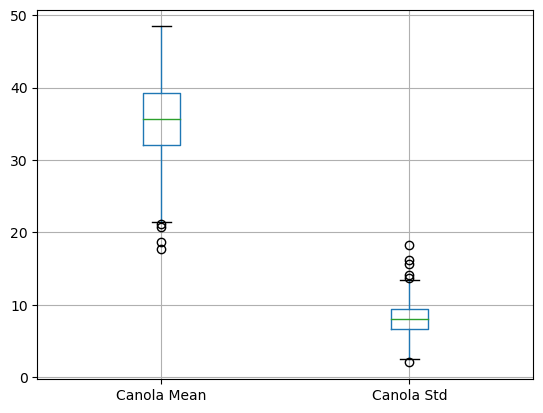

In [23]:
ds.boxplot()

In [24]:
from scipy.stats import zscore # (std - mean) / std data standardization

In [25]:
zscore(ds.set_index('RM')).sort_values('Canola Mean') 
# In case of normal distribution

# 68% data is located -1 and 1
# 95% is located -2 and 2
# 98% is located -3 and 3

Canola Mean  Canola Std
RM                          
46     -3.392800    2.348478
51     -3.200675    0.488964
18     -2.818650    1.621671
43     -2.748206    0.580169
45     -2.672744    2.314223
..           ...         ...
493     1.856447   -0.322290
439     1.880692    0.562853
303     2.153306   -0.614008
470     2.427924   -1.944282
271     2.468301   -0.634001

[294 rows x 2 columns]

<Axes: xlabel='Year'>

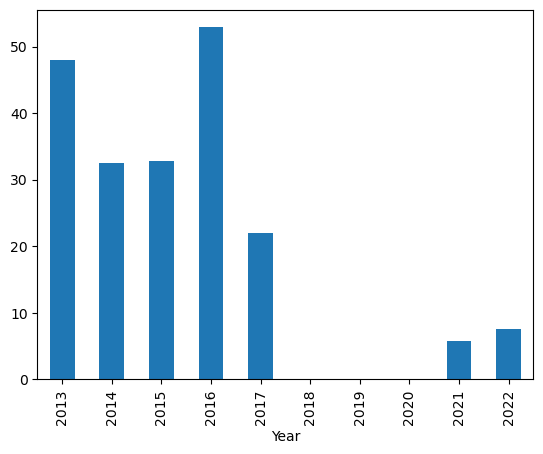

In [26]:
df.loc[(df['RM']== 141) & (df['Year'] > 2012)]\
    .set_index('Year')\
    ['Canola'].plot(kind = 'bar')

array([[<AxesSubplot:title={'center':'Canola Mean'}>,
        <AxesSubplot:title={'center':'Canola Std'}>]], dtype=object)

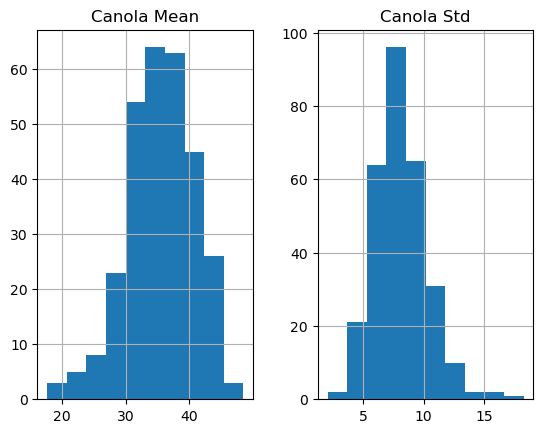

In [49]:
ds.hist()

In [60]:
ds.isna().sum()

RM             0
Canola Mean    0
Canola Std     0
dtype: int64

# Unsuoervised Machile Learning

## K Means

In [57]:
# Importing library
from sklearn.cluster import KMeans 

# Let's define our features
X = ds.set_index('RM')

from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM = KMeans(n_clusters=n, init='k-means++').fit(X)
    clusters_inertia.append(KM.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X, KM.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

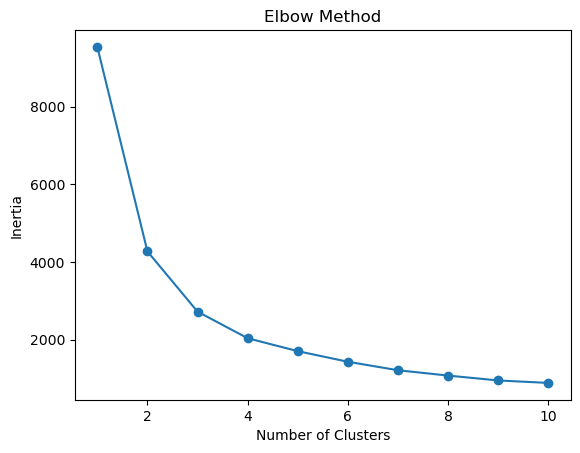

In [70]:
max_clusters = 10

# Perform K-means clustering for different number of clusters
inertia = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

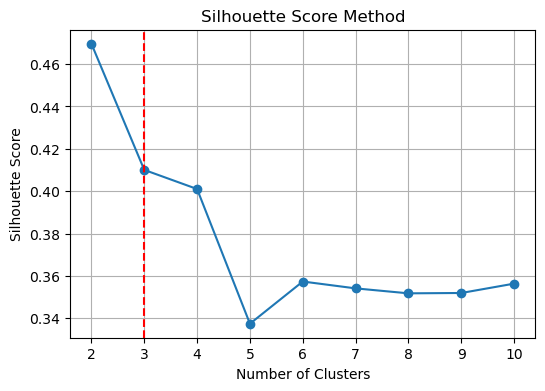

In [110]:
# Set the range of clusters to test
min_clusters = 2
max_clusters = 10

# Perform K-means clustering for different number of clusters
n_clusters = range(min_clusters, max_clusters + 1)
s_scores = []
for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    s_score = silhouette_score(X, labels)
    s_scores.append(s_score)

# Plot the silhouette scores
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(n_clusters, s_scores, marker='o')
ax.set_title("Silhouette Score Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
ax.axvline(3, ls="--", c="red")
ax.grid(True)
plt.show()

In [78]:
# Cluster 3
df_3_clusters = KMeans(n_clusters=3, init='k-means++').fit(X) # initialise and fit K-Means model

df_3= X.copy()
df_3.loc[:,'Cluster_4'] = df_3_clusters.labels_ # append labels to points

# Clusters 4
df_4_clusters = KMeans(n_clusters=4, init='k-means++').fit(X) # initialise and fit K-Means model

df_4= X.copy()
df_4.loc[:,'Cluster_4'] = df_4_clusters.labels_ # append labels to points

# Clusters 5
df_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X) # initialise and fit K-Means model

df_5= X.copy()
df_5.loc[:,'Cluster_4'] = df_5_clusters.labels_ # append labels to points

In [83]:
gdf[['RMNO', 'geometry']].rename(columns = {'RMNO': 'RM'})

RM                                           geometry
0     95  POLYGON ((654081.000 5546088.320, 654885.320 5...
1    378  POLYGON ((265258.740 5810148.180, 266062.740 5...
2    288  POLYGON ((254141.490 5701256.420, 254179.510 5...
3    106  POLYGON ((339874.810 5539057.770, 339849.430 5...
4    132  POLYGON ((445175.620 5573313.600, 445572.880 5...
..   ...                                                ...
293  588  MULTIPOLYGON (((307104.520 6003527.820, 307139...
294  352  POLYGON ((187054.680 5758478.840, 187005.860 5...
295  351  POLYGON ((209380.850 5785495.100, 209851.950 5...
296  520  MULTIPOLYGON (((451283.150 5981138.420, 451285...
297  491  POLYGON ((439451.190 5922989.290, 439441.900 5...

[298 rows x 2 columns]

<AxesSubplot:>

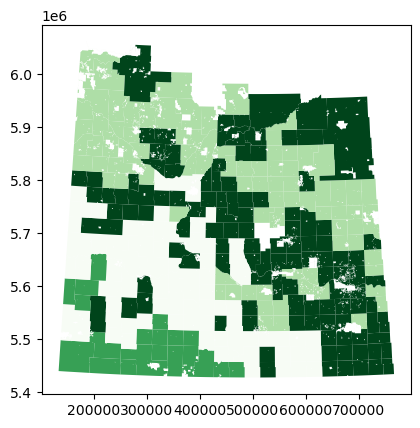

In [108]:
gpd.GeoDataFrame(pd.merge(
    df_4,
    gdf[['RMNO', 'geometry']].rename(columns = {'RMNO': 'RM'}),
     on='RM' )).plot('Cluster_4', cmap='Greens', scheme='naturalbreaks', k=4)

In [96]:
df_4.groupby('Cluster_4').mean()

Canola Mean  Canola Std
Cluster_4                         
0            31.025479    9.369612
1            41.489669    7.579458
2            24.496224   11.745245
3            35.786570    7.110033

In [97]:
df_4.groupby('Cluster_4')\
    .mean()\
    .sort_values('Canola Mean')

Canola Mean  Canola Std
Cluster_4                         
2            24.496224   11.745245
0            31.025479    9.369612
3            35.786570    7.110033
1            41.489669    7.579458

In [101]:
df_4['Cl_4']=df_4['Cluster_4'].replace(to_replace={
    2:0,
    0:1,
    3:2,
    1:3
})

In [102]:
df_4

Canola Mean  Canola Std  Cluster_4  Cl_4
RM                                           
1         34.035    4.714758          3     2
2         33.515    4.058955          3     2
3         34.103    4.238863          3     2
4         33.095    3.796540          3     2
5         32.304    4.659574          3     2
..           ...         ...        ...   ...
520       39.783    7.413043          1     3
555       40.092    7.145617          1     3
561       38.856    8.582959          1     3
588       37.569    7.127076          3     2
622       40.306    8.033867          1     3

[294 rows x 4 columns]

<AxesSubplot:>

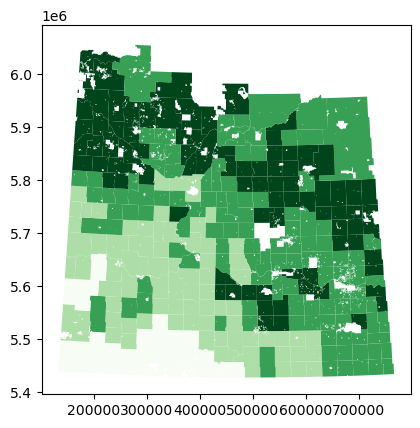

In [106]:
gpd.GeoDataFrame(pd.merge(
    df_4,
    gdf[['RMNO', 'geometry']].rename(columns = {'RMNO': 'RM'}),
     on='RM' )).plot('Cl_4', cmap='Greens', scheme='naturalbreaks', k=4)

In [104]:
gpd.GeoDataFrame(pd.merge(
    df_4,
    gdf[['RMNO', 'geometry']].rename(columns = {'RMNO': 'RM'}),
     on='RM' )).to_file('/Users/ruhidmirzayev/Canola_rm_clustering.geojson', driver='GeoJSON')